# Advanced Mechanics of Solids - Term Project (Group 2)

<center><img src="PS.png" width="500"/></center>
The figure shows a shaft with a keyway. The keyway is semicircular in shape and is defined by the curve $r=b$. The other part of the periphery is termed "shaft" and is given by $r=2a\cos\theta$. The objective is the find the stress field in the cross-section of the shaft upon for a torsional load. The Prandtl stress function is given to be:
$$\psi(r,\, \theta) = K(b^2 - r^2)\left( 1 - \frac{2 a \cos(\theta)}{r} \right)$$

## Initialisation

Importing the required libraries:

In [5]:
from polarUtilities import *
from IPython.display import Math, Latex
import matplotlib.pyplot as plt
import numpy as np

Initialising the variables:

In [8]:
K, r, theta = sym.symbols('K,r,theta')
a, b, mu, alpha, x, y = sym.symbols('a, b, mu, alpha, x, y', positive=True)

## Proving that the given form of $\psi(r, \theta)$ is indeed correct

The form of $\psi(r, \theta)$ given in the question is:

In [12]:
psi = sym.Function('psi')(r,theta)
psi = K*(b**2-r**2)*(1-(2*a*sym.cos(theta))/r)
display(Math(r'\psi(r, \theta) = {}'.format(sym.latex(psi))))

<IPython.core.display.Math object>

For proving that the above form of $\psi$ is appropriate for the solution, we need to show that the value of $\psi$ on the boundary is constant.

In [15]:
psi_val_keyway = psi.subs(r, b)
psi_val_shaft  = psi.subs(r, 2*a*sym.cos(theta))
display(Math(r'\psi_{{\rm{{keyway}}}} = {}'.format(sym.latex(psi_val_keyway))))
display(Math(r'\psi_{{\rm{{shaft}}}}  = {}'.format(sym.latex(psi_val_shaft))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Since $\psi$ is $0$ on the boundary, this form of the Prandtl stress function would solve the problem.

## Obtaining K

Next, we solve the equation $$\nabla^2\psi(r, \theta)=-1.$$

In [20]:
Eqn_lhs = polarLaplacian(psi)
Eqn_rhs = -1
Eqn = sym.Eq(Eqn_lhs, Eqn_rhs)
K_soln = sym.solve(Eqn,K);
display(Math(r'K = {}'.format(sym.latex(K_soln[0]))))

<IPython.core.display.Math object>

Substituting the value of $K$ in the Prandtl stress function gives,

In [23]:
psi_soln = psi.subs(K,sym.solve(Eqn,K)[0])
display(Math(r'\psi(r, \theta) = {}.'.format(sym.latex(psi_soln))))

<IPython.core.display.Math object>

## Obtaining the shear stresses $\tau_{{xz}}$ and $\tau_{{yz}}$ and the resultant shear stress $\tau$

The expression for the shear stresses are: 

In [27]:
tau_xz =  2*mu*alpha*del_dely(psi_soln)
tau_yz = -2*mu*alpha*del_delx(psi_soln)
display(Math(r'\tau_{{xz}} = {}'.format(sym.latex(tau_xz))))
display(Math(r'\tau_{{yz}} = {}'.format(sym.latex(tau_yz))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The resultant shear stress $\tau=\sqrt{\tau_{xz}^2 + \tau_{yz}^2}$ is given by,

In [30]:
tau = sym.sqrt(sym.simplify(tau_xz**2 + tau_yz**2))
display(Math(r'\tau = {}'.format(sym.latex(tau))))

<IPython.core.display.Math object>

To obtain the resultant shear stress on the keyway, $\tau_{\mathrm{keyway}}$, substitute $r=b$ in the above equation:

## Obtaining the resultant shear stress on the keyway, $\tau_{{\rm{{keyway}}}}$

In [34]:
tau_keyway = sym.simplify(tau.subs(r, b))
display(Math(r'\tau_{{\rm{{keyway}}}} = {}'.format(sym.latex(tau_keyway))))

<IPython.core.display.Math object>

Next, we plot the variation of $\tau_{{\rm{{keyway}}}}$($\theta$). For plotting this we first need to find the limits of $\theta$ for which this is valid. This limit is defined as $[-\theta_0,\; \theta_0]$. $\theta_0$ can be found by solving for the intersection of the two curves defining the keyway and shaft, i.e., $2a\cos\theta_0=b$

We plot $\tau_{{\rm{{keyway}}}}$($\theta$) for various values of $a$ while keeping the other parameters fixed. It is evident that, as $a$ increases, $\theta_0$ also increases. Furthermore, increasing $a$ also increases the maximum the stress on the keyway. Lastly, the maximum value of $\tau_{{\rm{{keyway}}}}$ is obtained at $\theta=0$.

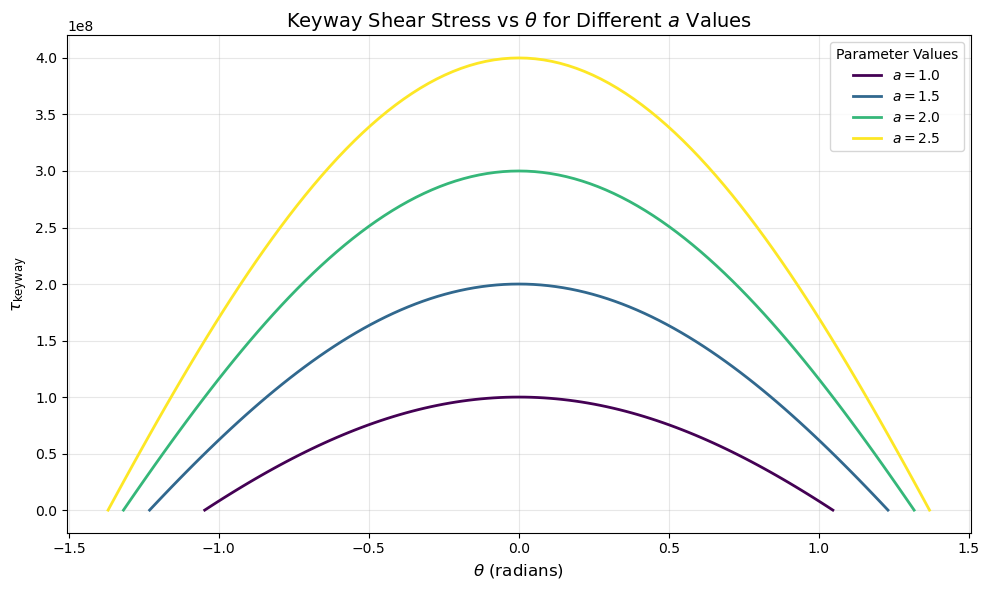

In [37]:
b_val = 1
mu_val = 10.e9
alpha_val = 0.01
a_vals = [1.0, 1.5, 2.0, 2.5]  # Different a values to plot

plt.figure(figsize=(10, 6))

# Color palette for different curves
colors = plt.cm.viridis(np.linspace(0, 1, len(a_vals)))

for a_val, color in zip(a_vals, colors):
    # Calculate valid theta range
    theta0_val = np.arccos(b_val/(2*a_val))
    
    # Generate theta values within valid range
    theta_vals = np.linspace(-theta0_val, theta0_val, num=101)
    
    # Create numerical function with current parameters
    tau_func = sym.lambdify(theta, 
                          tau_keyway.subs({
                              alpha: alpha_val,
                              mu: mu_val,
                              a: a_val,
                              b: b_val
                          }), 
                          "numpy")
    
    # Calculate and plot
    tau_vals = tau_func(theta_vals)
    plt.plot(theta_vals, tau_vals, 
             label=fr'$a = {a_val}$', 
             color=color, 
             linewidth=2)

# Add plot decorations
plt.xlabel(r'$\theta$ (radians)', fontsize=12)
plt.ylabel(r'$\tau_{\mathrm{keyway}}$', fontsize=12)
plt.title(r'Keyway Shear Stress vs $\theta$ for Different $a$ Values', fontsize=14)
plt.legend(title='Parameter Values', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Obtaining the resultant shear stress on the shaft, $\tau_{{\rm{{shaft}}}}$

Similarly, the resultant shear stress on the shaft, $\tau_{\mathrm{shaft}}$, is obtained by substituting $r=2\,a\cos(\theta)$ in the expression for $\tau$:

In [41]:
tau_shaft = sym.simplify(tau.subs(r, 2*a*sym.cos(theta)))
display(Math(r'\tau_{{\rm{{shaft}}}} = {}'.format(sym.latex(tau_shaft))))

<IPython.core.display.Math object>

Similar to the above plot, now we plot the resultant stress $\tau_{{\rm{{shaft}}}}$ on the shaft. And again the range plotting this expression is $[-\theta_0,\; \theta_0]$.

Only the parameter $a$ is varied for this plot. We find that the stress is maximum at $\theta=0$ and increases with $a$, just like the stress on keyway. However, unlike the previous plot, here we find that the stress is almost uniform near $\theta=0$.

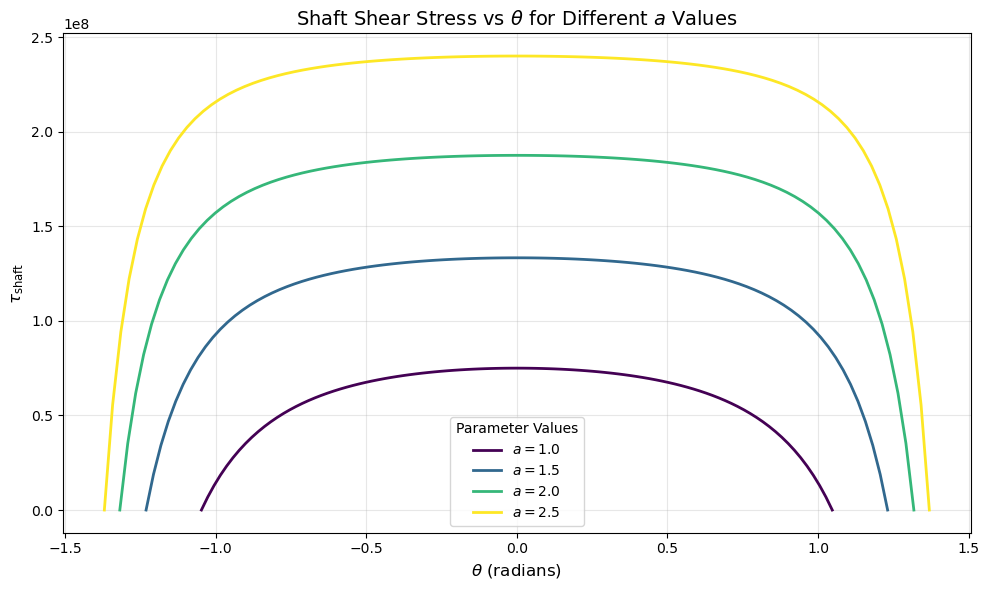

In [44]:
b_val = 1
mu_val = 10.e9
alpha_val = 0.01
a_vals = [1.0, 1.5, 2.0, 2.5]  # Different a values to plot

plt.figure(figsize=(10, 6))

# Color palette for different curves
colors = plt.cm.viridis(np.linspace(0, 1, len(a_vals)))

for a_val, color in zip(a_vals, colors):
    # Calculate valid theta range
    theta0_val = np.arccos(b_val/(2*a_val))
    
    # Generate theta values within valid range
    theta_vals = np.linspace(-theta0_val, theta0_val, num=101)
    
    # Create numerical function with current parameters
    tau_shaft_func = sym.lambdify(theta, 
                          tau_shaft.subs({
                              alpha: alpha_val,
                              mu: mu_val,
                              a: a_val,
                              b: b_val
                          }), 
                          "numpy")
    
    # Calculate and plot
    tau_shaft_vals = tau_shaft_func(theta_vals)
    plt.plot(theta_vals, tau_shaft_vals, 
             label=fr'$a = {a_val}$', 
             color=color, 
             linewidth=2)

# Add plot decorations
plt.xlabel(r'$\theta$ (radians)', fontsize=12)
plt.ylabel(r'$\tau_{\mathrm{shaft}}$', fontsize=12)
plt.title(r'Shaft Shear Stress vs $\theta$ for Different $a$ Values', fontsize=14)
plt.legend(title='Parameter Values', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Comparing the stress above obtained stress with that from a solid shaft

The maximum value of the resultant shear stress on the keyway is obtained by substituting $\theta=\pi$ in $\tau_{\mathrm{keyway}}$. Therefore,

In [48]:
tau_keyway_max = tau_keyway.subs(theta, sym.pi)
display(Math(r'\tau_{{\rm{{keyway, max}}}} = {}'.format(sym.latex(tau_keyway_max))))

<IPython.core.display.Math object>

For a solid shaft of circular cross-section, the maximum resultant shear stress is 

In [51]:
tau_solidShaft_max = alpha*mu*a
display(Math(r'\tau_{{\rm{{solid\,shaft, max}}}} = {}'.format(sym.latex(tau_solidShaft_max))))

<IPython.core.display.Math object>

The concentration factor is denoted by $k$. Therefore,

In [54]:
k = tau_keyway_max/tau_solidShaft_max
display(Math(r'k = \frac{{\tau_{{\rm{{keyway, max}}}}}}{{\tau_{{\rm{{solid\,shaft, max}}}}}}= {}'.format(sym.latex(k))))

<IPython.core.display.Math object>

## Concentration factor

Let, $f$ denote the ratio $b/a$. Therefore

In [58]:
f = sym.Symbol('f')
k = sym.simplify(k.subs(b, a*f))
display(Math(r'k = {{b/a+2}} = {{f+2}}'.format(sym.latex(1))))

<IPython.core.display.Math object>

Plotting the concentration factor versus $b/a$: 

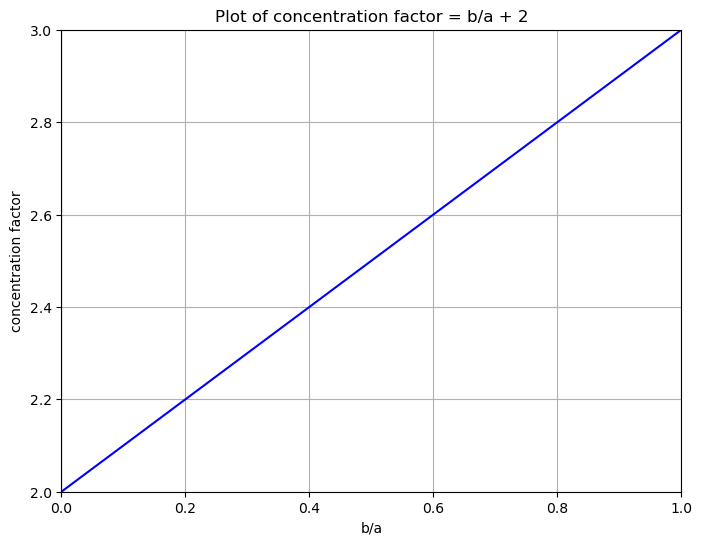

In [61]:
k_func = sym.lambdify(f, k, "numpy")
f_values = np.linspace(0, 1, num=10)  
k_values = k_func(f_values)
plt.figure(figsize=(8, 6))
plt.plot(f_values, k_values, label='concentration_factor = f + 2', color='blue')
plt.axhline(0, color='black', linewidth=0.8)  # x-axis
plt.axvline(0, color='black', linewidth=0.8)  # y-axis
plt.xlabel('b/a')
plt.ylabel('concentration factor')
plt.title('Plot of concentration factor = b/a + 2')
plt.xlim(0, 1)  
plt.ylim(2, 3)  
plt.grid(True)
plt.show()


In [271]:
k_limit = sym.limit(k, f, 0)
k_limit

2